# Лабораторная работа 1

6409, Зубов Егор

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [32]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scripts.data_utils import load_CIFAR10
import tensorflow as tf
from sklearn.model_selection import KFold
import os 


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [33]:
# Загрузка данных
cifar10_dir = 'scripts/datasets/cifar-10-batches-py'
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
scripts/datasets/cifar-10-batches-py\data_batch_1
scripts/datasets/cifar-10-batches-py\data_batch_2
scripts/datasets/cifar-10-batches-py\data_batch_3
scripts/datasets/cifar-10-batches-py\data_batch_4
scripts/datasets/cifar-10-batches-py\data_batch_5
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



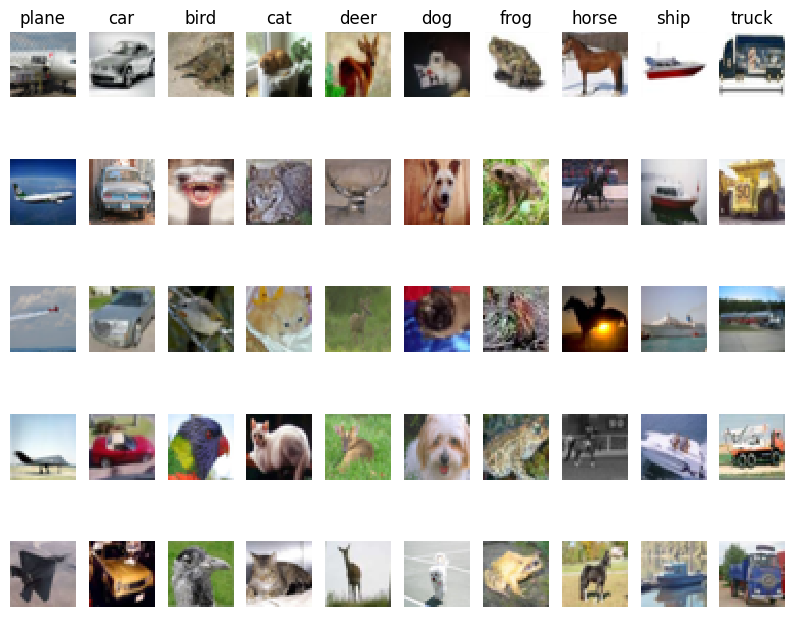

In [34]:
class_labels = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_labels_len = len(class_labels)
samples_count = 5

for index, class_label in enumerate(class_labels):
    class_indexes = np.random.choice(np.flatnonzero(y_train == index), samples_count, replace=False)
    for i, idx in enumerate(class_indexes):
        plt_idx = i * class_labels_len + index + 1
        plt.subplot(samples_count, class_labels_len, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(class_label)

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [35]:
# Берем срез для ускорения вычислений
X_train = X_train[0:5000]
y_train = y_train[0:5000]
X_test = X_test[0:1000]
y_test = y_test[0:1000]

# Преобразование в одномерный массив
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [36]:
from scripts.classifiers import KNearestNeighbor

# Инициализация объекта
knn_classifier = KNearestNeighbor()
# Обучение модели
knn_classifier.train(X_train, y_train)

1.5 Выполните классификацию на тестовой выборке

In [37]:
from time import time
time1 = time()
dists_no_loops = knn_classifier.compute_distances_no_loops(X_test)
time2 = time()
print(f'No loops: {time2-time1}s')

No loops: 0.25499963760375977s


In [38]:
time1 = time()
dists_one_loop = knn_classifier.compute_distances_one_loop(X_test)
time2 = time()
print(f'One loop: {time2-time1}s')

One loop: 77.60744738578796s


In [39]:
time1 = time()
dists_two_loops = knn_classifier.compute_distances_two_loops(X_test)
time2 = time()
print(f'Two loops: {time2-time1}s')

Two loops: 36.85113739967346s


1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


<function matplotlib.pyplot.show(close=None, block=None)>

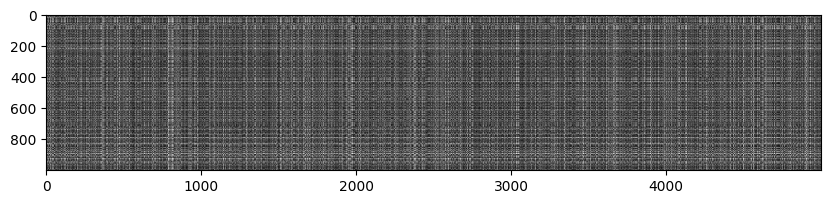

In [40]:
plt.imshow(dists_no_loops, interpolation='none')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

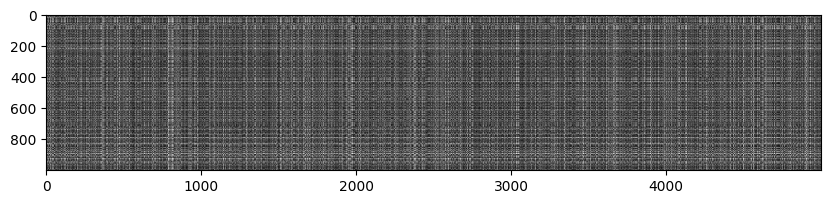

In [41]:
plt.imshow(dists_one_loop, interpolation='none')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

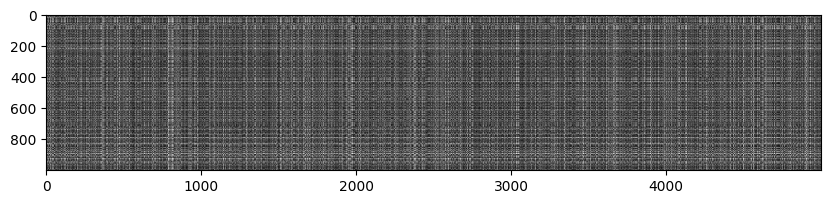

In [42]:
plt.imshow(dists_two_loops, interpolation='none')
plt.show


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [43]:
y_pred = knn_classifier.predict_labels(dists_no_loops, k = 2)
correctly_classified = np.sum(y_pred == y_test) / len(y_pred)
print('Доля верно классифицированных изображений из тестовой выборки: ', correctly_classified)

y_pred = knn_classifier.predict_labels(dists_one_loop, k = 2)
correctly_classified = np.sum(y_pred == y_test) / len(y_pred)
print('Доля верно классифицированных изображений из тестовой выборки: ', correctly_classified)

y_pred = knn_classifier.predict_labels(dists_two_loops, k = 2)
correctly_classified = np.sum(y_pred == y_test) / len(y_pred)
print('Доля верно классифицированных изображений из тестовой выборки: ', correctly_classified)

Доля верно классифицированных изображений из тестовой выборки:  0.229
Доля верно классифицированных изображений из тестовой выборки:  0.229
Доля верно классифицированных изображений из тестовой выборки:  0.229


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

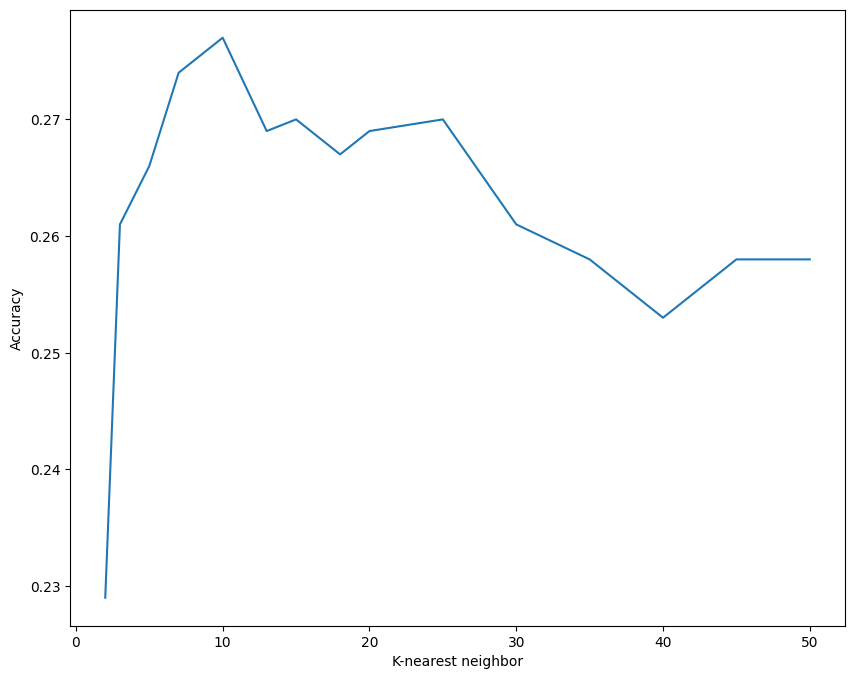

In [44]:
neighbors_count_arr = [2,3,5,7,10,13,15,18,20,25,30,35,40,45,50]
accuracy = {}
for neighbor_count in neighbors_count_arr:
    knn_classifier = KNearestNeighbor()
    knn_classifier.train(X_train, y_train)
    dists_two_loops = knn_classifier.compute_distances_no_loops(X_test)
    y_pred = knn_classifier.predict_labels(dists_two_loops, k = neighbor_count)
    accuracy[neighbor_count] = np.sum(y_pred == y_test) / len(y_pred)

plt.plot(neighbors_count_arr, accuracy.values())
plt.xlabel("K-nearest neighbor")
plt.ylabel("Accuracy")
plt.show()


1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [45]:
best_neighbors_count = max(accuracy, key = accuracy.get)
print('Оптимальное число соседей:', best_neighbors_count)

Оптимальное число соседей: 10



1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [46]:
knn_classifier_best = KNearestNeighbor()
knn_classifier_best.train(X_train, y_train)

y_pred_no_loops = knn_classifier_best.predict(X_test, best_neighbors_count, num_loops=0)
correctly_classified_no_loops = np.sum(y_pred_no_loops == y_test) / len(y_pred_no_loops)

y_pred_one_loop = knn_classifier_best.predict(X_test, best_neighbors_count, num_loops=1)
correctly_classified_one_loop = np.sum(y_pred_one_loop == y_test) / len(y_pred_one_loop)

y_pred_two_loops = knn_classifier_best.predict(X_test, best_neighbors_count, num_loops=2)
correctly_classified_two_loops = np.sum(y_pred_two_loops == y_test) / len(y_pred_two_loops)

print(f'Доля верно классифицированных при количестве соседей: {best_neighbors_count}, количество циклов: {0} - {correctly_classified_no_loops}')
print(f'Доля верно классифицированных при количестве соседей: {best_neighbors_count}, количество циклов: {1} - {correctly_classified_one_loop}')
print(f'Доля верно классифицированных при количестве соседей: {best_neighbors_count}, количество циклов: {2} - {correctly_classified_two_loops}')

Доля верно классифицированных при количестве соседей: 10, количество циклов: 0 - 0.277
Доля верно классифицированных при количестве соседей: 10, количество циклов: 1 - 0.277
Доля верно классифицированных при количестве соседей: 10, количество циклов: 2 - 0.277


1.11 Сделайте выводы по результатам 1 части задания.

В результате проделанной работы можно сделать следующие выводы:
- Точность метода KNN зависит от числа выбранных соседей. Если использовать большое количество соседей модель может переобучиться, если слишком маленькое - недообучиться
- Точность также зависит и от способа подсчета расстояния. Чем точнее способ, тем точнее итоговая точность модели

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [47]:
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass


X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

X_val = X_train[49000:50000]
y_val = y_train[49000:50000]

X_train = X_train[0:49000]
y_train = y_train[0:49000]

X_dev = X_test[9000:10000]
y_dev = y_test[9000:10000]

X_test = X_test[0:9000]
y_test = y_test[0:9000]

X_train = np.reshape(X_train, (X_train.shape[0], -1))
y_train = np.reshape(y_train, (y_train.shape[0],))

X_val = np.reshape(X_val, (X_val.shape[0], -1))
y_val = np.reshape(y_val, (y_val.shape[0],))

X_test = np.reshape(X_test, (X_test.shape[0], -1))
y_test = np.reshape(y_test, (y_test.shape[0],))

X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
y_dev = np.reshape(y_dev, (y_dev.shape[0],))

print(f'X_train: {X_train.shape}\nX_val: {X_val.shape}\nX_test: {X_test.shape}\nX_dev: {X_dev.shape}')

Clear previously loaded data.
scripts/datasets/cifar-10-batches-py\data_batch_1
scripts/datasets/cifar-10-batches-py\data_batch_2
scripts/datasets/cifar-10-batches-py\data_batch_3
scripts/datasets/cifar-10-batches-py\data_batch_4
scripts/datasets/cifar-10-batches-py\data_batch_5
X_train: (49000, 3072)
X_val: (1000, 3072)
X_test: (9000, 3072)
X_dev: (1000, 3072)


3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


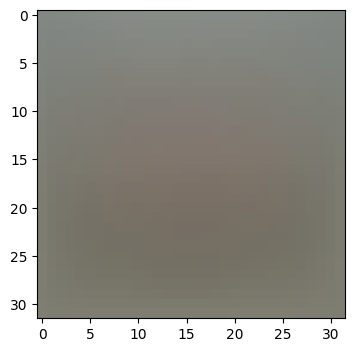

(49000, 3073) (1000, 3073) (9000, 3073) (1000, 3073)


In [48]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()


X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image



X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])


print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

3.4 Реализуйте функции в classifiers/softmax.py




In [49]:
from scripts.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
print(X_dev.shape, y_dev.shape)
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

(1000, 3073) (1000,)
loss: 2.392420
sanity check: 2.302585


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [50]:
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)


from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: 0.527234 analytic: 0.527234, relative error: 2.115379e-08
numerical: -0.595907 analytic: -0.595907, relative error: 1.977762e-07
numerical: -2.519295 analytic: -2.519295, relative error: 3.114894e-08
numerical: 0.792594 analytic: 0.792594, relative error: 1.421594e-07
numerical: -3.484291 analytic: -3.484291, relative error: 3.511616e-09
numerical: -1.844473 analytic: -1.844474, relative error: 7.316217e-09
numerical: -0.631318 analytic: -0.631318, relative error: 1.454595e-07
numerical: -1.401299 analytic: -1.401299, relative error: 1.718585e-08
numerical: -2.385785 analytic: -2.385785, relative error: 2.105740e-08
numerical: -0.786992 analytic: -0.786992, relative error: 4.372452e-08
numerical: 1.155268 analytic: 1.155268, relative error: 2.936649e-08
numerical: -0.701858 analytic: -0.701858, relative error: 3.900587e-08
numerical: 2.796103 analytic: 2.796102, relative error: 4.206804e-08
numerical: 1.829977 analytic: 1.829977, relative error: 3.134363e-08
numerical: -2.95

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [51]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.392420e+00 computed in 0.155999s
vectorized loss: 2.392420e+00 computed in 0.005001s
Loss difference: 0.000000
Gradient difference: 0.000000


3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

In [52]:
from scripts.classifiers.linear_classifier import Softmax

softmax_classifier = Softmax()
softmax_classifier.train(X_train, y_train)
y_pred = softmax_classifier.predict(X_test)
correctly_classified = np.sum(y_pred == y_test) / len(y_pred)
print(f'accuracy: {correctly_classified}')

d:\Jupyter notebook\Нейронки\DL_Course_SamU\lab_1-2\scripts\classifiers\softmax.py:87: RuntimeWarning: overflow encountered in exp
  
d:\Jupyter notebook\Нейронки\DL_Course_SamU\lab_1-2\scripts\classifiers\softmax.py:94: RuntimeWarning: overflow encountered in exp
  dW = dW / num_train + W * reg
d:\Jupyter notebook\Нейронки\DL_Course_SamU\lab_1-2\scripts\classifiers\softmax.py:94: RuntimeWarning: invalid value encountered in divide
  dW = dW / num_train + W * reg


accuracy: 0.09922222222222223


3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [53]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]
results = {}
best_accuracy = -1

for rate in learning_rates:
    for strength in regularization_strengths:
        softmax_classifier = Softmax()
        softmax_classifier.train(X_train, y_train, rate, strength)
        y_train_pred = softmax_classifier.predict(X_train)
        y_val_pred = softmax_classifier.predict(X_val)
        train_accuracy = np.sum(y_train_pred == y_train) / len(y_train)
        val_accuracy = np.sum(y_val_pred == y_val) / len(y_val)
        results[(rate, strength)] = (train_accuracy, val_accuracy)
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy

for rate, strength in sorted(results):
    train_accuracy, val_accuracy = results[(rate, strength)]
    print(f'Rate: {rate}, regularization_strength: {strength}, train_accuracy: {train_accuracy}, val_accuracy: {val_accuracy}')
    
print(f'Best accuracy: {best_accuracy}')

Rate: 1e-07, regularization_strength: 25000.0, train_accuracy: 0.14826530612244898, val_accuracy: 0.139
Rate: 1e-07, regularization_strength: 50000.0, train_accuracy: 0.14318367346938776, val_accuracy: 0.141
Rate: 5e-05, regularization_strength: 25000.0, train_accuracy: 0.0826734693877551, val_accuracy: 0.064
Rate: 5e-05, regularization_strength: 50000.0, train_accuracy: 0.10026530612244898, val_accuracy: 0.087
Best accuracy: 0.141


3.10 Сделайте выводы по третьей части задания

В результате проделанной работы были сделаны следущие выводы:
- Лучшей точности на валидационной выборке удалось добиться при learning_rate = 1e-07 и regularization_strength = 50000, а именно - 0.141
- Время работы softmax_loss_vectorized значительно ниже, чем время работы softmax_loss_naive